# ANN Coursework - MLP Technique

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import csv
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [2]:
data_train = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training"
data_test = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing"

path_train = pathlib.Path(data_train)
path_test = pathlib.Path(data_test)

print(path_train)
image_count_train = len(list(path_train.glob('*/*.jpg')))
print(image_count_train)

print(path_test)
image_count_test = len(list(path_test.glob('*/*.jpg')))
print(image_count_test)

C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training
2870
C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing
394


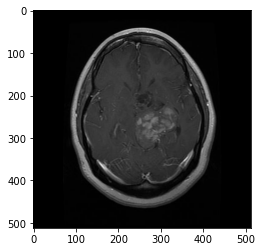

In [3]:
categories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

for category in categories:
    path_tr = os.path.join(path_train,category) # this will map the training path folders to the particular category
  

 # read the image as an array
    
    for img in os.listdir(path_tr):
        img_array_tr = cv2.imread(os.path.join(path_tr,img)) 
        plt.imshow(img_array_tr)
        plt.show()
        break
    break

(-0.5, 127.5, 127.5, -0.5)

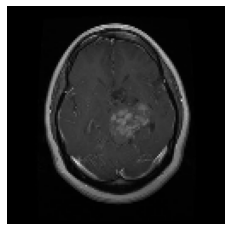

In [4]:
img_size = 128 # we want to convert all our images to have the same size (some might had different sizes)

array1 = cv2.resize(img_array_tr,(img_size, img_size)) # resizing all the images
plt.imshow(array1, cmap ="gray")
plt.axis("off")

In [5]:
train_tumor = []

for i in categories:
    train_path = os.path.join(data_train,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [6]:
X_train = []
y_train = []
for i,j in train_tumor:
    X_train.append(i) # i is basically the images
    y_train.append(j) # is basically the categories
    
X_train = np.array(X_train).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_train.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_train = X_train/255.0 # we devide with 255.0 because the pixel intensity lies between 0 - 255 for mathematical simplification
X_train = X_train.reshape(-1,128,128,1)

(2870, 128, 128)


In [7]:
test_tumor = []

for i in categories:
    test_path = os.path.join(data_test,i)
    tag = categories.index(i)
    for img in os.listdir(test_path):
        try:
            image_arr = cv2.imread(os.path.join(test_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            test_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [8]:
X_test = []
y_test = []
for i,j in test_tumor:
    X_test.append(i) # i is basically the images
    y_test.append(j) # is basically the categories
    
X_test = np.array(X_test).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_test.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_test = X_test/255.0 # we devide with 255.0 because the pixel intensity lies between 0 - 255 for mathematical simplification
X_test = X_test.reshape(-1,128,128,1)

(394, 128, 128)


In [9]:
# convert the brain tumor categories into numbers using one-hot-encoding

y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [10]:
# our dataset is already split into train-test, so we just need to also use some data for validation

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 128, 128, 1)
x_test shape (574, 128, 128, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [11]:
dim_data = np.prod(X_train.shape[1:])
train_data = X_train.reshape(X_train.shape[0], dim_data)
val_data = X_val.reshape(X_val.shape[0], dim_data)
test_data = X_test.reshape(X_test.shape[0], dim_data)

# Model creation

In [12]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(4, activation='softmax'))


In [13]:
#compute model parameters

model_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 8,653,828
Trainable params: 8,653,828
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model_reg.fit(train_data, Y_train, batch_size=40, epochs=10, verbose=1,
                   validation_data=(val_data, Y_val))


Epoch 1/10
115/115 [==============================] - 6s 49ms/step - loss: 1.1041 - accuracy: 0.4839 - val_loss: 1.0204 - val_accuracy: 0.5488
Epoch 2/10
115/115 [==============================] - 6s 48ms/step - loss: 1.0754 - accuracy: 0.4778 - val_loss: 0.9745 - val_accuracy: 0.5732
Epoch 3/10
115/115 [==============================] - 5s 48ms/step - loss: 1.1195 - accuracy: 0.4599 - val_loss: 0.9964 - val_accuracy: 0.5575
Epoch 4/10
115/115 [==============================] - 5s 47ms/step - loss: 1.0910 - accuracy: 0.4887 - val_loss: 0.9752 - val_accuracy: 0.5610
Epoch 5/10
115/115 [==============================] - 5s 47ms/step - loss: 1.0636 - accuracy: 0.4808 - val_loss: 0.9891 - val_accuracy: 0.5453
Epoch 6/10
115/115 [==============================] - 5s 46ms/step - loss: 1.0654 - accuracy: 0.4795 - val_loss: 0.9695 - val_accuracy: 0.5662
Epoch 7/10
115/115 [==============================] - 5s 46ms/step - loss: 1.1501 - accuracy: 0.4338 - val_loss: 1.0356 - val_accuracy: 0.5035

# Model evaluation

In [16]:
[test_loss, test_acc] = model_reg.evaluate(test_data, y_test, verbose=2)

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

13/13 - 0s - loss: 1.5122 - accuracy: 0.3883
Evaluation result on Test Data : Loss = 1.5121657848358154, accuracy = 0.38832488656044006


Text(0.5, 1.0, 'Accuracy Curves')

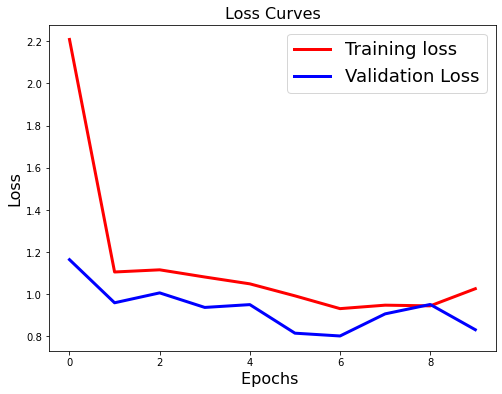

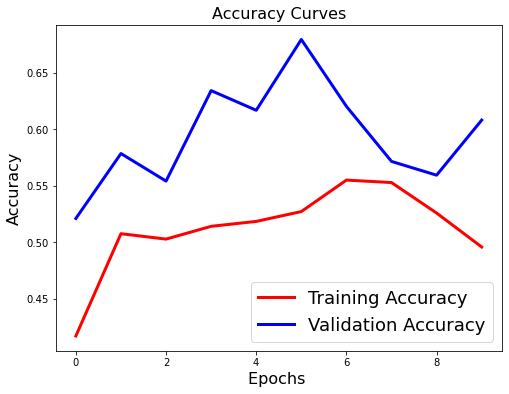

In [17]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16

Model prediction: 0


C:\Users\giorg\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Ground Truth : [1. 0. 0. 0.]')

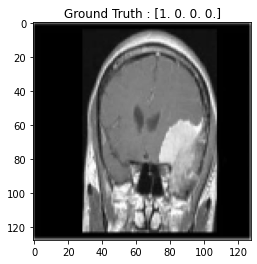

In [18]:
# Predict the most likely class

print("Model prediction: {}".format(model_reg.predict_classes(test_data[[1],:])[0]))
 
# Display the predicted image
plt.imshow(X_test[100], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[1]))
